### Crystal Structure Prediction of ABO3 perovskite-type oxides 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [2]:
df = pd.read_csv('C:\\Users\\udays\\Documents\\train data.csv')

In [3]:
df.head()

,v(A),v(B),r(AXII)(A),r(AVI)(A),r(BVI)(A),EN(A),EN(B),l(A-O)(A),l(B-O)(A),?ENR,tG,tau,mu,Lowest distortion
0,0,0,0.52,0.52,0.93,2.18,2.54,2.214685,2.313698,-1.728214,0.582680,0.000000,0.664286,cubic
1,0,0,1.03,0.86,0.60,1.27,1.90,2.500930,0.000000,-1.768643,0.859135,0.000000,0.428571,cubic
2,2,4,0.92,0.67,0.53,1.83,1.88,2.290644,1.930311,-1.468464,0.849994,4.936558,0.378571,cubic
3,1,5,1.64,1.38,0.62,0.82,2.36,3.025719,1.745600,-1.974429,1.064161,3.977376,0.442857,orthorhombic
4,0,0,0.57,0.57,0.71,2.20,1.30,2.300109,2.027412,-1.622357,0.660190,0.000000,0.507143,cubic


### Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v(A)               4139 non-null   int64  
 1   v(B)               4139 non-null   int64  
 2   r(AXII)(A)         4139 non-null   float64
 3   r(AVI)(A)          4139 non-null   float64
 4   r(BVI)(A)          4139 non-null   float64
 5   EN(A)              4139 non-null   float64
 6   EN(B)              4139 non-null   float64
 7   l(A-O)(A)          4139 non-null   float64
 8   l(B-O)(A)          4139 non-null   float64
 9   ?ENR               4139 non-null   float64
 10  tG                 4139 non-null   float64
 11  tau                4139 non-null   float64
 12  mu                 4139 non-null   float64
 13  Lowest distortion  4139 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 452.8+ KB


In [5]:
df.describe()

,v(A),v(B),r(AXII)(A),r(AVI)(A),r(BVI)(A),EN(A),EN(B),l(A-O)(A),l(B-O)(A),?ENR,tG,tau,mu
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000
mean,0.881856,1.381493,1.005617,0.841834,0.802190,1.547601,1.598294,2.323373,2.018614,-2.186582,0.781014,1.314168,0.572994
std,1.674102,2.161027,0.336618,0.240230,0.235233,0.447246,0.443158,0.635195,0.553570,0.637094,0.135812,20.815510,0.168022
min,-1.000000,-1.000000,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,-480.827696,0.192857
25%,-1.000000,-1.000000,0.730000,0.670000,0.630000,1.200000,1.220000,2.294004,1.956808,-2.570661,0.680864,0.000000,0.450000
50%,0.000000,0.000000,0.980000,0.860000,0.760000,1.500000,1.600000,2.422517,2.075849,-2.084214,0.776496,0.000000,0.542857
75%,2.000000,3.000000,1.240000,0.960000,0.940000,1.910000,1.960000,2.582926,2.284156,-1.734464,0.873300,3.892903,0.671429
max,5.000000,5.000000,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.321062,305.871348,1.192857


In [6]:
df.isnull().sum()

v(A)                 0
v(B)                 0
r(AXII)(A)           0
r(AVI)(A)            0
r(BVI)(A)            0
EN(A)                0
EN(B)                0
l(A-O)(A)            0
l(B-O)(A)            0
?ENR                 0
tG                   0
tau                  0
mu                   0
Lowest distortion    0
dtype: int64

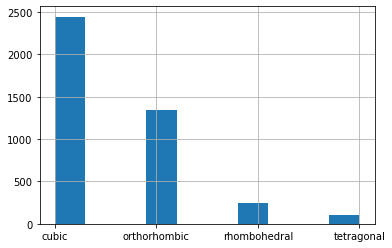

In [7]:
df['Lowest distortion'].hist()
plt.style.use('ggplot')

<AxesSubplot:>

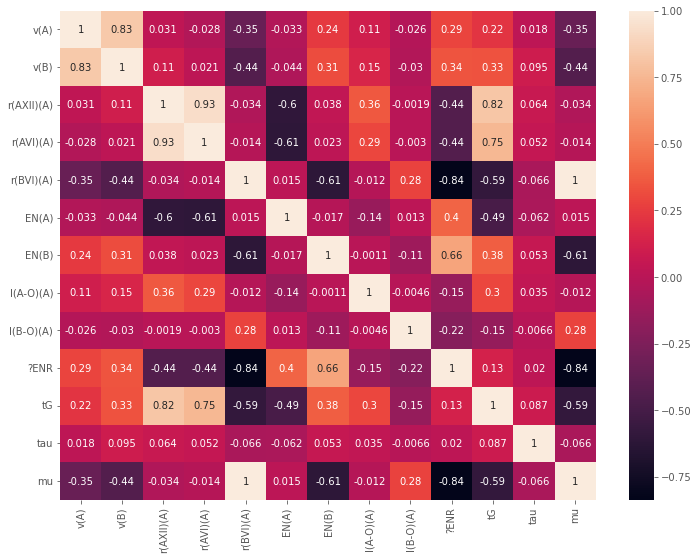

In [8]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlations, annot=True)

### Test Train Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Lowest distortion',axis=1)
y = df['Lowest distortion']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)

0.7352657004830918

Feature: 0, Score: 0.00580
Feature: 1, Score: 0.02238
Feature: 2, Score: 0.06858
Feature: 3, Score: 0.07659
Feature: 4, Score: 0.02978
Feature: 5, Score: 0.08589
Feature: 6, Score: 0.09619
Feature: 7, Score: 0.06903
Feature: 8, Score: 0.13322
Feature: 9, Score: 0.12432
Feature: 10, Score: 0.20011
Feature: 11, Score: 0.05398
Feature: 12, Score: 0.03414


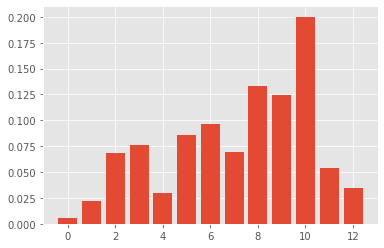

In [15]:
importance = dtree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Prediction and Evaluation

In [16]:
predictions = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.82      0.84      0.83       589
orthorhombic       0.69      0.67      0.68       353
rhombohedral       0.31      0.33      0.32        67
  tetragonal       0.36      0.31      0.33        26

    accuracy                           0.74      1035
   macro avg       0.55      0.54      0.54      1035
weighted avg       0.73      0.74      0.73      1035



In [18]:
print(confusion_matrix(y_test,predictions))

[[495  72  15   7]
 [ 78 236  32   7]
 [ 17  28  22   0]
 [ 11   5   2   8]]


### k-fold validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10)
n = 1
dtree_dt = DecisionTreeClassifier()

X_data = np.array(X)
y_data = np.array(y)

DT_scores = []

for train, val in kfold.split(X_data, y_data):

    dtree_dt.fit(X_data[train], y_data[train])
    acc = dtree_dt.score(X_data[val], y_data[val])
    DT_scores.append(acc)
    print(f"Dtree: Fold {n} ACC: {round(acc, 2)}")

    print("---------------------")

    n += 1

Dtree: Fold 1 ACC: 0.73
---------------------
Dtree: Fold 2 ACC: 0.73
---------------------
Dtree: Fold 3 ACC: 0.76
---------------------
Dtree: Fold 4 ACC: 0.73
---------------------
Dtree: Fold 5 ACC: 0.76
---------------------
Dtree: Fold 6 ACC: 0.75
---------------------
Dtree: Fold 7 ACC: 0.71
---------------------
Dtree: Fold 8 ACC: 0.75
---------------------
Dtree: Fold 9 ACC: 0.74
---------------------
Dtree: Fold 10 ACC: 0.74
---------------------


### Feature Importance

Feature: 0, Score: 0.00580
Feature: 1, Score: 0.02238
Feature: 2, Score: 0.06858
Feature: 3, Score: 0.07659
Feature: 4, Score: 0.02978
Feature: 5, Score: 0.08589
Feature: 6, Score: 0.09619
Feature: 7, Score: 0.06903
Feature: 8, Score: 0.13322
Feature: 9, Score: 0.12432
Feature: 10, Score: 0.20011
Feature: 11, Score: 0.05398
Feature: 12, Score: 0.03414


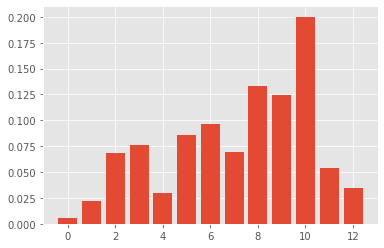

In [20]:
importance = dtree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Training Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=1000)
rfm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [22]:
rfm.score(X_test, y_test)

0.8019323671497585

### Prediction and Evaluation

In [23]:
predictions = rfm.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       cubic       0.84      0.90      0.87       589
orthorhombic       0.78      0.75      0.77       353
rhombohedral       0.50      0.34      0.41        67
  tetragonal       0.56      0.35      0.43        26

    accuracy                           0.80      1035
   macro avg       0.67      0.59      0.62      1035
weighted avg       0.79      0.80      0.79      1035



In [25]:
print(confusion_matrix(y_test,predictions))

[[532  46   7   4]
 [ 71 266  13   3]
 [ 23  21  23   0]
 [  8   6   3   9]]


### Feature Importance

Feature: 0, Score: 0.02299
Feature: 1, Score: 0.02362
Feature: 2, Score: 0.08402
Feature: 3, Score: 0.07652
Feature: 4, Score: 0.07169
Feature: 5, Score: 0.08447
Feature: 6, Score: 0.09048
Feature: 7, Score: 0.07121
Feature: 8, Score: 0.08492
Feature: 9, Score: 0.12845
Feature: 10, Score: 0.13464
Feature: 11, Score: 0.05398
Feature: 12, Score: 0.07302


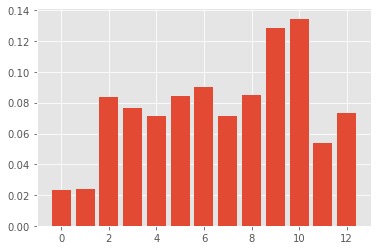

In [26]:
importance = rfm.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forest Model has better accuracy than Decision Tree model
1. Decision Tree: 73.52%
2. Random Forest: 80.19%